In [1]:
import numpy as np
# NumPy: Library for numerical operations and array handling.

import pandas as pd
# Pandas: Library for data manipulation and analysis, including DataFrame structures.

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
# Pandas options to display floating-point numbers with 2 decimal places and show up to 100 rows in output.

import matplotlib.pyplot as plt
# Matplotlib: Library for creating static, interactive, and animated visualizations.

%matplotlib inline
# IPython magic command to display Matplotlib plots inline in Jupyter notebooks.

import seaborn as sns
sns.set_style('darkgrid')
# Seaborn: Library for statistical data visualization built on top of Matplotlib. 
# Set the default style for Seaborn plots to 'darkgrid'.

import warnings
warnings.filterwarnings("ignore")

# Import various metrics to evaluate model performance.

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Import train_test_split function to split the data into training and testing sets.

from sklearn.preprocessing import StandardScaler
# Import StandardScaler for feature scaling.

# ! pip install M-ana-package
import MAna as ma
ma.set_seed()
# Import a custom module 'MAna' and set the random seed for reproducibility.

## Concatnating all the datasets in the Dataset_2bsend directiry into one dataset:

In [103]:
# import os

# # set the directory containing the CSV files
# directory = 'Dataset_Sep2023'

# # create an empty list to hold all the dataframes
# df_list = []                                              

# # iterate over all files in the directory
# for filename in os.listdir(directory):
#     if filename.endswith('.csv'):
#         # read the CSV file into a pandas dataframe
#         filepath = os.path.join(directory, filename)
#         df = pd.read_csv(filepath)
        
#         # append the dataframe to the list
#         df_list.append(df)

# # concatenate all dataframes in the list into a single dataframe
# data = pd.concat(df_list, ignore_index=True)

data = pd.read_excel(r'Dataset_Sep2023\Data file.xlsx')

# print the resulting dataframe
data.head()

mobile_number usage_week Subscriber_Type  Package_Id   
0  1933088297626 2022-04-01         Prepaid        1373  \
1  1933088361652 2022-04-01         Prepaid        1366   
2  1933088324608 2022-04-01         Prepaid        1366   
3  1933088310566 2022-04-01         Prepaid        1368   
4  1933088253384 2022-04-01         Prepaid        1362   

                        Package_name nationality        Brith_of_date GENDER   
0                     MOBILY SIM 150         KSA  1990-09-03 00:00:00      F  \
1  Mobily_Welcoming_Package-PRJ01056       India  1900-01-01 00:00:00      M   
2  Mobily_Welcoming_Package-PRJ01056       YEMEN  1900-01-01 00:00:00      M   
3                     Mobily Prepaid         KSA  1981-11-02 00:00:00      M   
4                     7ala19_Package         KSA  1900-01-01 00:00:00      M   

  Newtwork_status last_date_of_Revenue  ... SN_STC_MOC SN_ZAIN_MOC   
0           VALID           2022-03-21  ...        NaN         NaN  \
1          GRACE1           2022-02-03  ...        NaN         NaN   
2           VALID           2022-03-21  ...        NaN         NaN   
3           VALID           2022-03-19  ...        NaN         NaN   
4           VALID           2022-04-01  ...       0.00        0.00   

  SN_VIRGIN_MOC  SN_LEBARA_MOC  SN_STC_MTC  SN_ZAIN_MTC  SN_VIRGIN_MTC   
0           NaN            NaN         NaN          NaN            NaN  \
1           NaN            NaN         NaN          NaN            NaN   
2           NaN            NaN         NaN          NaN            NaN   
3           NaN            NaN         NaN          NaN            NaN   
4          0.00           0.00        0.00         0.00           0.00   

   SN_LEBARA_MTC  SN_TOTAL_MOC  SN_TOTAL_MTC  
0            NaN           NaN           NaN  
1            NaN           NaN           NaN  
2            NaN           NaN           NaN  
3            NaN           NaN           NaN  
4           0.00         10.00         22.00  

[5 rows x 59 columns]

In [104]:
disconnected_numbers = pd.read_excel(r'Dataset_Sep2023\Discunnect Number.xlsx').iloc[:,0].astype(float)
data['mobile_number'] = data['mobile_number'].astype(float)
disconnected_data = data[data.mobile_number.isin(disconnected_numbers)].copy()
disconnected_data['state'] = 'disconnected'
active_data = data[~data.mobile_number.isin(disconnected_numbers)].copy()
active_data['state'] = 'active'

In [105]:
disconnected_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48109 entries, 23 to 930804
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mobile_number                48109 non-null  float64       
 1   usage_week                   48109 non-null  datetime64[ns]
 2   Subscriber_Type              48109 non-null  object        
 3   Package_Id                   48109 non-null  int64         
 4   Package_name                 48109 non-null  object        
 5   nationality                  47742 non-null  object        
 6   Brith_of_date                46869 non-null  object        
 7   GENDER                       46699 non-null  object        
 8   Newtwork_status              48109 non-null  object        
 9   last_date_of_Revenue         48109 non-null  datetime64[ns]
 10  Last_call_date               39456 non-null  datetime64[ns]
 11  last_Recharge_date           47167 non-null 

In [106]:
active_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882713 entries, 0 to 930821
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   mobile_number                882713 non-null  float64       
 1   usage_week                   882713 non-null  datetime64[ns]
 2   Subscriber_Type              882713 non-null  object        
 3   Package_Id                   882713 non-null  int64         
 4   Package_name                 882713 non-null  object        
 5   nationality                  875991 non-null  object        
 6   Brith_of_date                869090 non-null  object        
 7   GENDER                       863048 non-null  object        
 8   Newtwork_status              882713 non-null  object        
 9   last_date_of_Revenue         882713 non-null  datetime64[ns]
 10  Last_call_date               778763 non-null  datetime64[ns]
 11  last_Recharge_date           86

In [120]:
data = pd.concat([disconnected_data,active_data.sample(n=int(len(disconnected_data)*0.25))]).reset_index().iloc[:,1:]
data.state.value_counts()/len(data)

state
disconnected   0.80
active         0.20
Name: count, dtype: float64

In [121]:
len(data)

60136

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60136 entries, 0 to 60135
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mobile_number                60136 non-null  float64       
 1   usage_week                   60136 non-null  datetime64[ns]
 2   Subscriber_Type              60136 non-null  object        
 3   Package_Id                   60136 non-null  int64         
 4   Package_name                 60136 non-null  object        
 5   nationality                  59647 non-null  object        
 6   Brith_of_date                58677 non-null  object        
 7   GENDER                       58430 non-null  object        
 8   Newtwork_status              60136 non-null  object        
 9   last_date_of_Revenue         60136 non-null  datetime64[ns]
 10  Last_call_date               50057 non-null  datetime64[ns]
 11  last_Recharge_date           58937 non-nu

In [123]:
# data = data.drop(['rev_mms_total','rev_voice_sms_plus_other','rev_video_call_total','rev_roam_outgoing', 'rev_roam_incoming', 'ON_NET_INCOMING_SECS',
# 'ON_NET_INCOMING_CALLS','on_net_outgoing_Secs','on_net_outgoing_calls','on_net_outgoing_Secs_Free','on_net_outgoing_calls_Free','OFF_NET_INCOMING_SECS','OFF_NET_INCOMING_CALLS','off_net_outgoing_Secs','off_net_outgoing_calls','off_net_outgoing_Secs_Free','off_net_outgoing_calls_Free','INT_INCOMING_SECS','INT_INCOMING_CALLS','int_outgoing_Secs','int_outgoing_calls','int_top_incoming_destination','int_top_outgoing_destination','int_outgoing_Secs_Free','int_outgoing_calls_Free','fix_incoming_Secs','fix_incoming_calls','fix_outgoing_Secs','fix_outgoing_calls','fix_outgoing_Secs_Free','fix_outgoing_calls_Free',
# 'sms_onnet_outgoing_count','sms_onnet_outgoing_count_Free','sms_offnet_outgoing_count','sms_offnet_outgoing_count_Free','sms_int_outgoing_count','sms_int_outgoing_count_Free','MMS_INCOMING_COUNT','mms_outgoing_count','mms_outgoing_count_Free','Data_in_Bundle_kb','Data_Out_Bundle_kb','Data_Session_Cnt','Data_Roam_kb','roam_MoC_Secs','roam_MoC_calls','roam_MoC_free_Secs','roam_MoC_free_calls','roam_MtC_Secs','roam_MtC_calls','roam_MtC_free_Secs','roam_MtC_free_calls','Rch_count_Digital','Rch_Digital_Rev',
# 'Rch_Value_Denom_5','Rch_Value_Denom_10','Rch_Value_Denom_20','Rch_Value_Denom_50','Rch_Value_Denom_100','Rch_Denom_Others_Cnt','Rch_Denom_Others_rev','Balance_Transfer_in_Cnt','Balance_transfer_out_Cnt','Balance_Transfer_in_rev','Balance_transfer_out_rev',
# 'Sun_Secs_Lcl','Mon_Secs_Lcl','Tue_Secs_Lcl','Wed_Secs_Lcl','Thu_Secs_Lcl','Fri_Secs_Lcl','Sat_Secs_Lcl','Sun_Secs_Intl','Mon_Secs_Intl','Tue_Secs_Intl','Wed_Secs_Intl','Thu_Secs_Intl','Fri_Secs_Intl','Sat_Secs_Intl','bal_avg_daily','bal_last_day','Recharge_Amount_GB','Count_of_recharge_GB','Bio_matric_Status','Nationality_Usage','Home_BTS_Outgoing_SMS','Home_BTS_Recharge','Home_BTS_Incoming_VOICE','Home_BTS_Incoming_SMS','FAV_OffNet_OPR','recharge_Color','INACTIVITY_COLOR',
# 'VCE_ONNET_MOC_BILLED_REV','SMS_ONNET_MOC_BILLED_REV','VCE_ONNET_MOC_BILLED_DRTN_SECS','VCE_ONNET_MOC_BILLED_CALLS','VCE_OFFNET_MOC_BILLED_DRTN_SECS','VCE_OFFNET_MOC_BILLED_CALLS','VCE_FIXED_MOC_BILLED_DRTN_SECS','VCE_FIXED_MOC_BILLED_CALLS','SMS_ONNET_MOC_BILLED_CNT','SMS_OFFNET_MOC_BILLED_CNT','SMS_INTL_MOC_BILLED_CNT',
# 'VCE_ONNET_MOC_WEEKDAYS_SECS','VCE_ONNET_MOC_WEEKEND_SECS','VCE_OFFNET_MOC_WEEKDAYS_SECS','VCE_OFFNET_MOC_WEEKEND_SECS','VCE_INTL_MOC_WEEKDAYS_SECS','VCE_INTL_MOC_WEEKEND_SECS',
# 'off_net_outgoing_Secs_stc','off_net_outgoing_calls_stc','off_net_outgoing_Secs_zain','off_net_outgoing_calls_zain','MI_Activity_Flag','Rev_Data_Rental','Rev_Rentals','Rev_Data_Total_NEW','CALL_CENTRE_CALLS','OVERDRAFT_CNT','OVERDRAFT_AMT','RCH_COUNT_DENOM_30','RCH_COUNT_DENOM_90','RCH_AMOUNT_DENOM_30','RCH_AMOUNT_DENOM_90','DATA_FREE_KB','Sms_IC_Cnt','Data_Addon_Rev_10GB','Data_Addon_Rev_5GB','Data_Addon_Rev_2GB','Data_Addon_Rev_1GB','Data_Addon_Rev_500MB','Data_Addon_Rev_150MB','CITY_NAME','GOVERNORATE_NAME','BALANCE_TRANSFER_OUT_FEE','COUNT_OF_ECN','REV_ECN','Rchg_Spl_Rev','Other_Rental_Count','Other_Revenue_Rental','LOGIN_COUNT','CALL_COUNT','COMPLAIN_COUNT','Unnamed: 202'], axis=1)


# Data Preprocessing:
## DateTime columns converting:

In [124]:
# Define a list of column names representing date columns in the DataFrame
date_cols = ['Brith_of_date', 'last_date_of_Revenue', 'Last_call_date', 'last_Recharge_date', 'activation_date']

# Loop through each date column
for col in date_cols:
    # Print the name of the current date column being processed
    print(col)

    # Convert the values in the current date column to pandas datetime objects
    # Set 'errors' to 'coerce', so any incorrect date values will be replaced with NaT (Not-a-Time)
    data[col] = pd.to_datetime(data[col], errors='coerce')

    # Drop rows with NaT values in the current date column
    # NaT values are generated when an incorrect date value is encountered during the conversion
    # This step removes rows with invalid or missing date information
    if col == 'last_Recharge_date':
        data.dropna(subset=[col], inplace=True)

# Output the summary information of the DataFrame after data cleaning and processing
data.info()

Brith_of_date
last_date_of_Revenue
Last_call_date
last_Recharge_date
activation_date
<class 'pandas.core.frame.DataFrame'>
Index: 58937 entries, 0 to 60135
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mobile_number                58937 non-null  float64       
 1   usage_week                   58937 non-null  datetime64[ns]
 2   Subscriber_Type              58937 non-null  object        
 3   Package_Id                   58937 non-null  int64         
 4   Package_name                 58937 non-null  object        
 5   nationality                  58489 non-null  object        
 6   Brith_of_date                57517 non-null  datetime64[ns]
 7   GENDER                       57270 non-null  object        
 8   Newtwork_status              58937 non-null  object        
 9   last_date_of_Revenue         58937 non-null  datetime64[ns]
 10  Last_call_date            

### DateTime columns ranges:

In [125]:
for dt_col in date_cols:
    print(dt_col,':', data[dt_col].min(), '-', data[dt_col].max())

Brith_of_date : 1874-01-14 00:00:00 - 2007-08-20 00:00:00
last_date_of_Revenue : 2021-12-23 00:00:00 - 2022-08-26 00:00:00
Last_call_date : 2021-12-23 00:00:00 - 2022-08-26 00:00:00
last_Recharge_date : 2018-01-18 00:00:00 - 2022-08-26 00:00:00
activation_date : 2007-11-06 00:00:00 - 2022-08-26 00:00:00


## Data Labeling:

In [126]:
len(data.mobile_number.unique())

15494

In [127]:
data.sort_values(by='last_Recharge_date', inplace=True)
# data.drop_duplicates(subset=['mobile_number','last_Recharge_date'],inplace=True)

data['mobile_number'] = data['mobile_number'].astype(int)

# Get unique mobile numbers from the 'mobile_number' column of the 'data' DataFrame
unique_MNs = data.mobile_number.unique()

# Initialize a new column 'churned' in the 'data' DataFrame, and set all values to False
data['churned'] = False

# Initialize an empty DataFrame 'labeled_data' with the same columns as 'data'
labeled_data = pd.DataFrame(columns=data.columns)

# Iterate over each unique mobile number to process churn status
for unique_MN in unique_MNs:
    # Create a new DataFrame 'MN_data' containing data for the current mobile number
    MN_data = data[data.mobile_number == unique_MN].copy().reset_index()

    # Iterate over the indices of the 'MN_data' DataFrame, excluding the last index
    for idx in MN_data.index[1:-1]:
        # Check if the difference between consecutive 'last_Recharge_date' values is greater than 60 days
        days_since_last_recharge = (MN_data['last_Recharge_date'].iloc[idx] - MN_data['last_Recharge_date'].iloc[idx-1]).days
        MN_data.loc[idx, 'days_since_last_recharge'] = days_since_last_recharge
        MN_data.loc[idx, 'hours_since_last_recharge'] = days_since_last_recharge * 24
        
        if (MN_data['last_Recharge_date'].iloc[idx+1] - MN_data['last_Recharge_date'].iloc[idx]).days > 60:
            # If the condition is met, set the 'churned' value for the current row to True
            MN_data.loc[idx, 'churned'] = True

    # Concatenate the processed 'MN_data' DataFrame to the 'labeled_data' DataFrame,
    # excluding the first column (which contains the index)
    labeled_data = pd.concat([labeled_data, MN_data.iloc[:, 1:]])

In [128]:
import plotly.express as px

px.histogram(labeled_data.days_since_last_recharge)

In [129]:
px.box(labeled_data.days_since_last_recharge)

In [130]:
len(data)

58937

In [131]:
labeled_data.churned.value_counts() # geting the count of each class we have in our data set

churned
False    58937
Name: count, dtype: int64

#### Now we have 407492 not churned customers and 219562 churned customer.

In [119]:
# labeled_data.to_csv('full_training_data.csv',index=False) # saving the labeled data.

In [13]:
labeled_data.head()

mobile_number usage_week Subscriber_Type Package_Id   
0  1933088209362 2022-08-26         Prepaid       1362  \
0  1933088354422 2022-05-27         Prepaid       1368   
0  1933088263224 2022-04-01         Prepaid       1362   
1  1933088263224 2022-06-10         Prepaid       1362   
0  1933088251546 2022-05-27         Prepaid       1379   

             Package_name nationality Brith_of_date GENDER Newtwork_status   
0          7ala19_Package         KSA    1975-05-12      M           VALID  \
0          Mobily Prepaid         KSA    1994-06-21      M           VALID   
0          7ala19_Package         KSA    1964-11-06      M           VALID   
1          7ala19_Package         KSA    1964-11-06      M          GRACE1   
0  Mobily_Welcome_Prepaid       Egypt    1989-08-01      M           VALID   

  last_date_of_Revenue  ... SN_LEBARA_MOC SN_STC_MTC SN_ZAIN_MTC   
0           2022-08-26  ...          0.00       6.00        1.00  \
0           2022-05-27  ...          0.00       3.00        0.00   
0           2022-03-27  ...           NaN        NaN         NaN   
1           2022-06-02  ...           NaN        NaN         NaN   
0           2022-05-27  ...          1.00       2.00        1.00   

   SN_VIRGIN_MTC  SN_LEBARA_MTC  SN_TOTAL_MOC  SN_TOTAL_MTC  churned   
0           0.00           0.00         14.00         22.00    False  \
0           0.00           0.00         10.00         15.00    False   
0            NaN            NaN           NaN           NaN    False   
1            NaN            NaN           NaN           NaN    False   
0           1.00           1.00         13.00         20.00    False   

   days_since_last_recharge  hours_since_last_recharge  
0                       NaN                        NaN  
0                       NaN                        NaN  
0                       NaN                        NaN  
1                       NaN                        NaN  
0                       NaN                        NaN  

[5 rows x 62 columns]

#### Number of unique values in each column in our dataset:

#### Number of null values in each column in our dataset:

In [26]:
labeled_data.isna().sum()

mobile_number                       0
usage_week                          0
Subscriber_Type                     0
Package_Id                          0
Package_name                        0
nationality                        29
Brith_of_date                       0
GENDER                            971
Newtwork_status                     0
last_date_of_Revenue                0
Last_call_date                      0
last_Recharge_date                  0
activation_date                     0
rev_voice_total                 31072
rev_sms_total                   31072
rev_data_total                  31072
rev_subscription_plus_other     31072
rev_on_net                      31072
rev_off_net                     31072
Rev_international_call          31072
rev_fix                         31072
rev_sms_onnet                   31072
rev_sms_offnet                  31072
rev_sms_int                     31072
Rev_Ring_Back_tone              31072
data_rental_rev                 31072
sms_rental_r

In [27]:
import plotly.express as px

px.bar(labeled_data.isna().sum())

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Drop unwanted columns from 'labeled_data'
modeling_data = labeled_data.drop(['Newtwork_status','Subscriber_Type', 'usage_week', 'Package_Id', 'Dealer_Id',
                                   'BEHAVIOR_SEGMENT', 'TAC'], axis=1)

# Step 2: Fill missing values in numerical columns with 0
num_cols = [col for col in modeling_data.columns if modeling_data[col].dtype not in ('object', 'datetime64[ns]')]
modeling_data[num_cols] = modeling_data[num_cols].fillna(0)

# Step 3: Drop rows with any remaining missing values
modeling_data.dropna(inplace=True)

# Step 4: Extract date features and drop original date columns
for col in date_cols:
    modeling_data[col + '_monthday'] = modeling_data[col].dt.day
    modeling_data[col + '_weekday'] = modeling_data[col].dt.dayofweek
    modeling_data[col + '_month'] = modeling_data[col].dt.month
    modeling_data[col + '_year'] = modeling_data[col].dt.year
    modeling_data.drop(col, axis=1, inplace=True)



# Step 5: Scale numerical features using StandardScaler
scaler = StandardScaler()
num_cols = [col for col in modeling_data.columns if modeling_data[col].dtype not in ('object', 'datetime64[ns]')]
modeling_data_scaled = scaler.fit_transform(modeling_data[num_cols])
modeling_data[num_cols] = pd.DataFrame(modeling_data_scaled, columns=num_cols)


# Step 6: Encode categorical features using LabelEncoder
cat_cols = [col for col in modeling_data.columns if modeling_data[col].dtype == 'object']
for col in cat_cols:
    modeling_data[col] = LabelEncoder().fit_transform(modeling_data[col].astype(str))

# Step 7: Drop rows with any remaining missing values after encoding
modeling_data.dropna(inplace=True)

disconnected_numbers = pd.read_excel(r'Dataset_Sep2023\Discunnect Number.xlsx').iloc[:,0].astype(float)
modeling_data['mobile_number'] = modeling_data['mobile_number'].astype(float)
modeling_data.mobile_number.isin(disconnected_numbers).sum() * 100 /len(modeling_data.mobile_number)

6.345403755178289

In [17]:
num_cols

['rev_voice_total',
 'rev_sms_total',
 'rev_data_total',
 'rev_subscription_plus_other',
 'rev_on_net',
 'rev_off_net',
 'Rev_international_call',
 'rev_fix',
 'rev_sms_onnet',
 'rev_sms_offnet',
 'rev_sms_int',
 'Rev_Ring_Back_tone',
 'data_rental_rev',
 'sms_rental_rev',
 'voice_rental_rev',
 'other_rental_rev',
 'rev_total',
 'SMS_INCOMING_COUNT',
 'Data_kb',
 'Rch_count_Voucher',
 'Rch_Voucher_Rev',
 'Rch_Count_Denom_5',
 'Rch_Count_Denom_10',
 'Rch_Count_Denom_20',
 'Rch_Count_Denom_50',
 'Rch_Count_Denom_100',
 'Act_days_lcl_moc',
 'Act_days_intl_moc',
 'Act_days_All_moc',
 'ACT_DAYS_VCE_MOC_ONNET',
 'ACT_DAYS_VCE_MOC_OFFNET',
 'SN_STC_MOC',
 'SN_ZAIN_MOC',
 'SN_VIRGIN_MOC',
 'SN_LEBARA_MOC',
 'SN_STC_MTC',
 'SN_ZAIN_MTC',
 'SN_VIRGIN_MTC',
 'SN_LEBARA_MTC',
 'SN_TOTAL_MOC',
 'SN_TOTAL_MTC',
 'days_since_last_recharge',
 'hours_since_last_recharge',
 'Brith_of_date_monthday',
 'Brith_of_date_weekday',
 'Brith_of_date_month',
 'Brith_of_date_year',
 'last_date_of_Revenue_monthday'

In [106]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115627 entries, 0 to 0
Data columns (total 69 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Package_name                   115627 non-null  int32  
 1   nationality                    115627 non-null  int32  
 2   GENDER                         115627 non-null  int32  
 3   rev_voice_total                115627 non-null  float64
 4   rev_sms_total                  115627 non-null  float64
 5   rev_data_total                 115627 non-null  float64
 6   rev_subscription_plus_other    115627 non-null  float64
 7   rev_on_net                     115627 non-null  float64
 8   rev_off_net                    115627 non-null  float64
 9   Rev_international_call         115627 non-null  float64
 10  rev_fix                        115627 non-null  float64
 11  rev_sms_onnet                  115627 non-null  float64
 12  rev_sms_offnet                 115627 no

In [107]:
modeling_data.churned.value_counts() # geting the count of each class we have in our data set

churned
0    113371
1      2256
Name: count, dtype: int64

### Ploting Data Correlations:

In [108]:
modeling_data = modeling_data[modeling_data.corr().dropna(axis=1, how='all').columns]

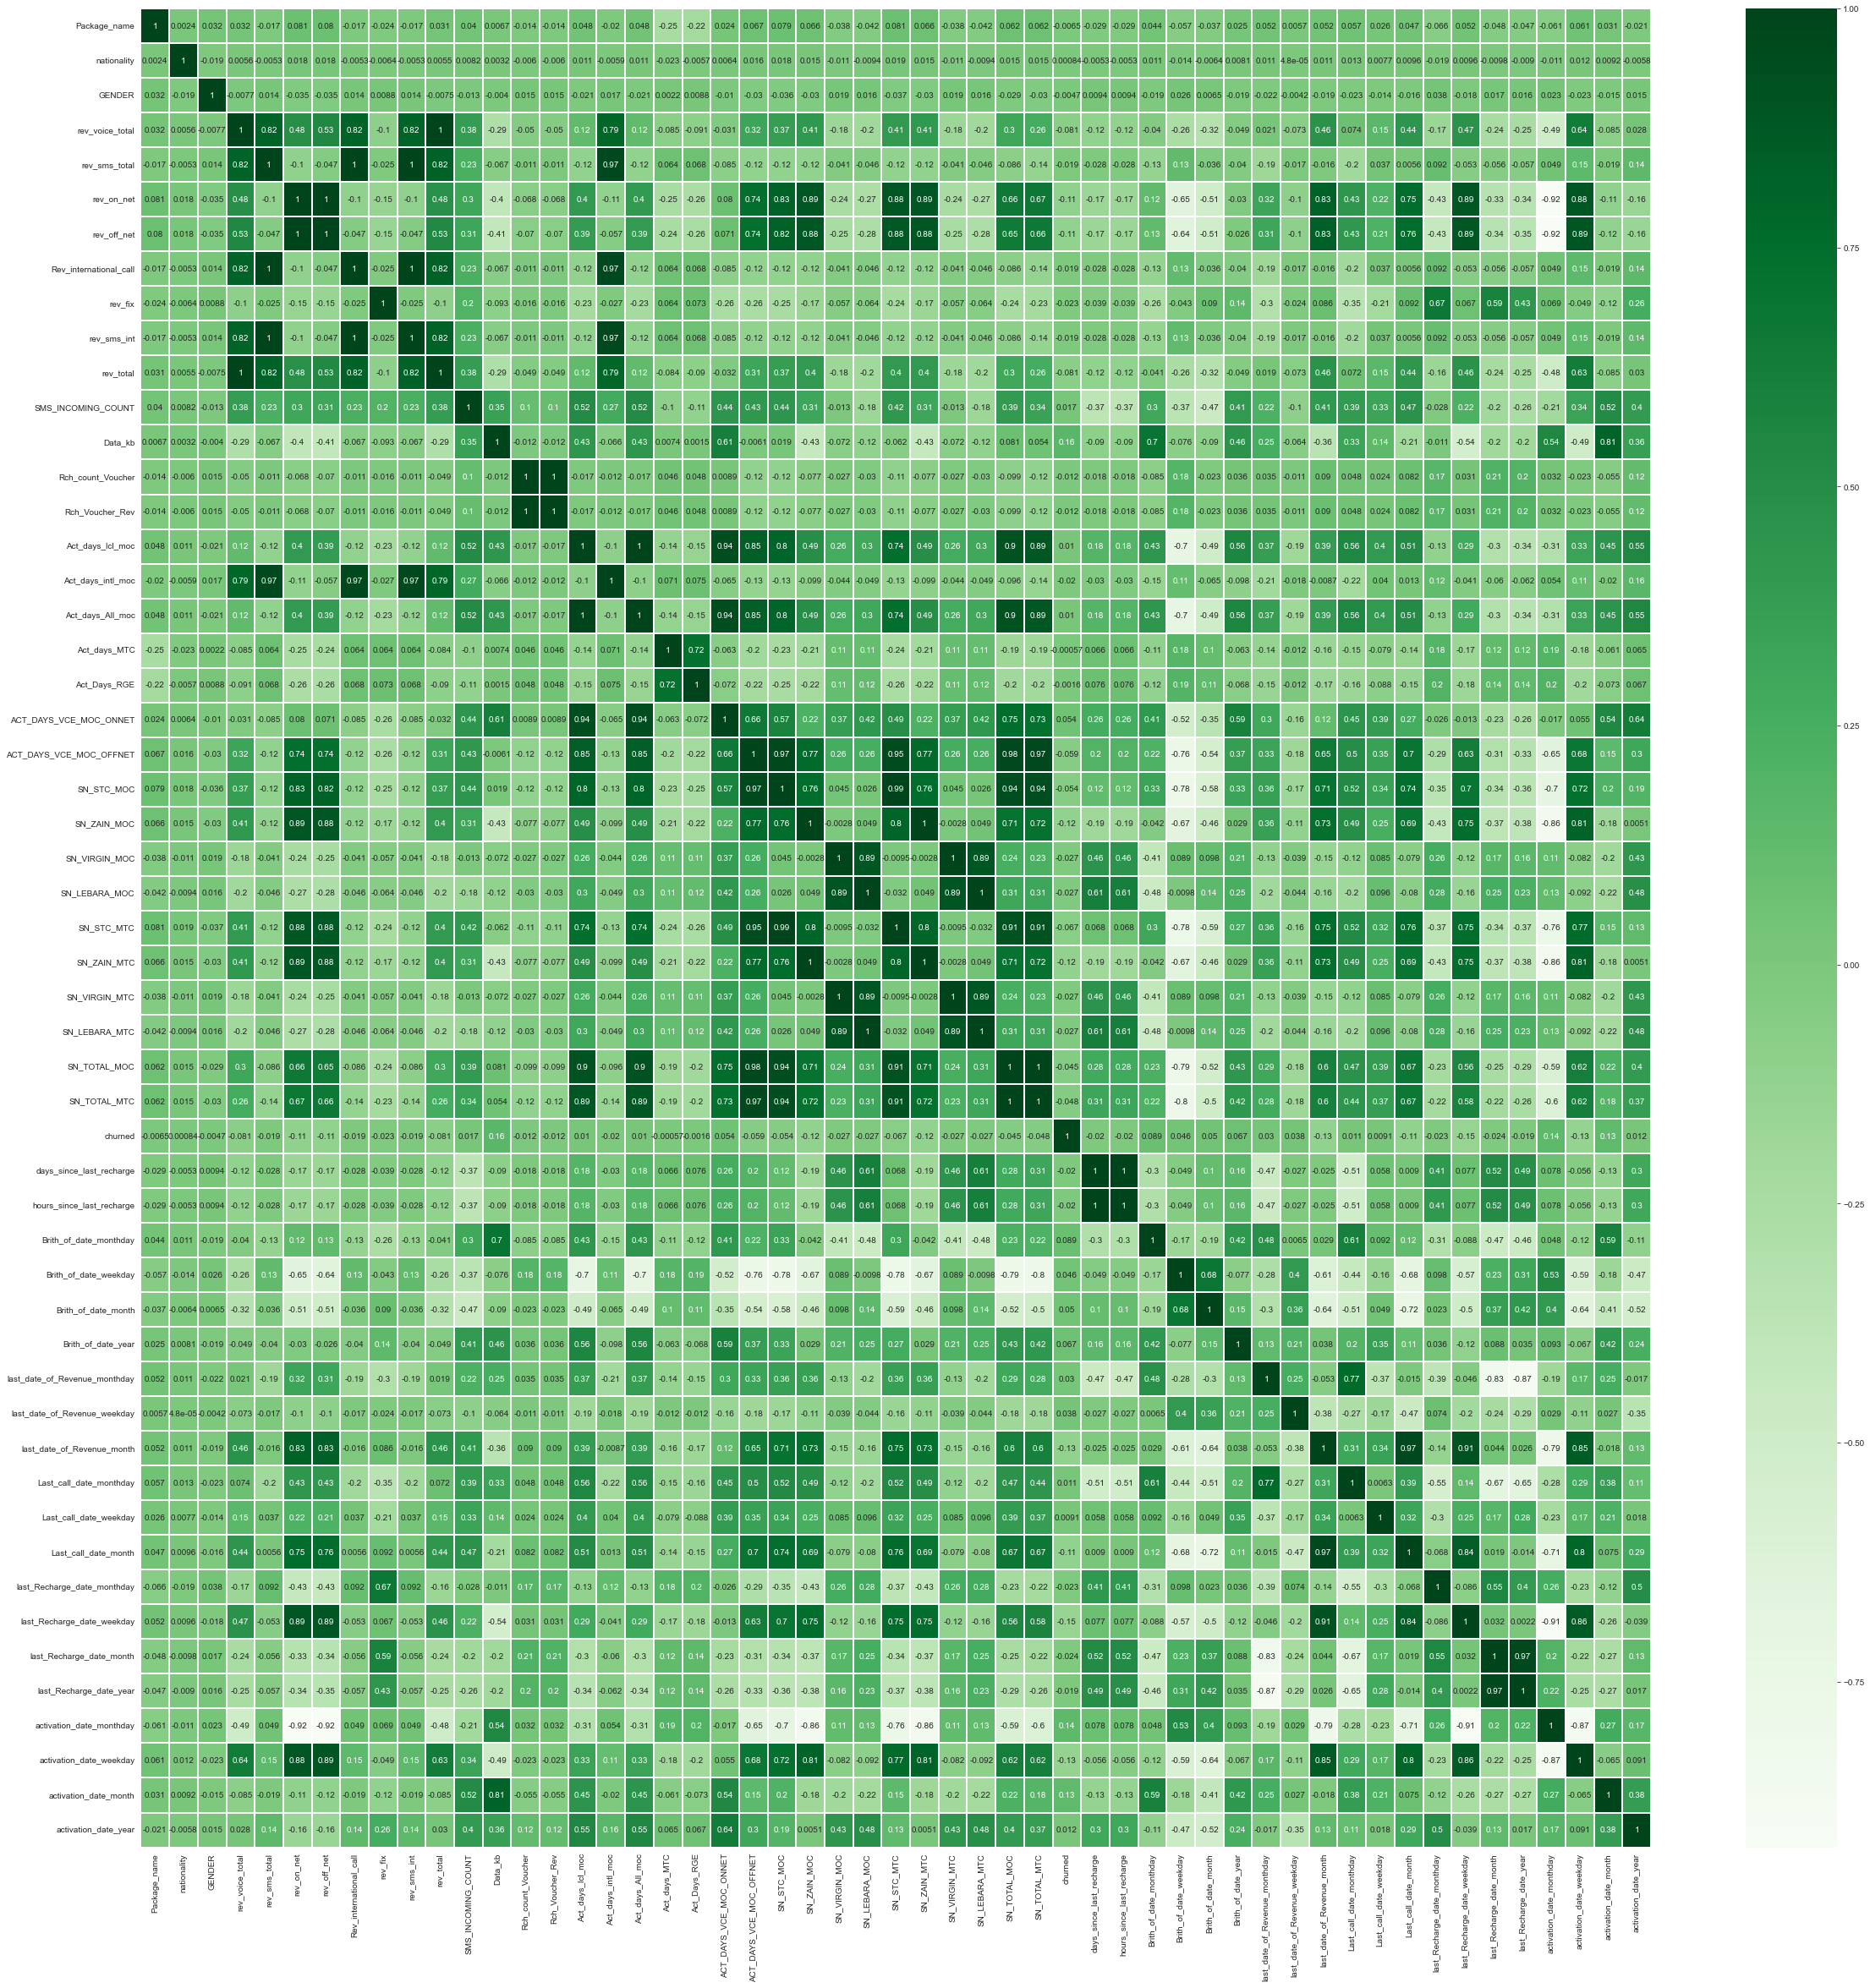

In [109]:
plt.figure(figsize=(40, 40))
sns.heatmap(modeling_data.corr(), annot=True, cmap="Greens", linewidths=0.1, annot_kws={"fontsize":10});

In [110]:
modeling_data.to_csv('modeling_data.csv',index=False) # Saving the preprocessed data.
# modeling_data = pd.read_csv('modeling_data.csv')

### Creating Train and Test sets:

In [111]:
# Extracting features (X) by dropping the 'churned' column from the 'modeling_data' DataFrame
X = modeling_data.drop(['churned'], axis=1)

# Extracting the target variable (y) by selecting only the 'churned' column from the 'modeling_data' DataFrame
y = modeling_data['churned']
print('Befroe Balancing:')
print(y.value_counts())

from sklearn.utils import resample

def balance_classes(X_train, y_train, random_state=42, majority_class = 0, minority_class = 1):
    # Concatenate X_train and y_train for easier manipulation
    train_data = pd.concat([X_train, y_train], axis=1)

    # Separate classes
    majority_class = train_data[train_data['churned'] == majority_class]
    minority_class = train_data[train_data['churned'] == minority_class]

    # Downsample majority class to match minority class size
    majority_downsampled = resample(majority_class,
                                    replace=False,
                                    n_samples=len(minority_class),
                                    random_state=random_state)

    # Combine minority class and downsampled majority class
    balanced_train_data = pd.concat([majority_downsampled, minority_class])

    # Shuffle the data
    balanced_train_data = balanced_train_data.sample(frac=1, random_state=random_state)

    # Separate X_train and y_train after balancing
    X_train_balanced = balanced_train_data.drop('churned', axis=1)
    y_train_balanced = balanced_train_data['churned']

    return X_train_balanced, y_train_balanced


# Assuming X_train and y_train are your original unbalanced training data
X, y = balance_classes(X, y, random_state=42)
print('After Balancing:')
print(y.value_counts())
# random_state=42: A random seed used to ensure reproducibility of the same train-test split each time the code runs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Befroe Balancing:
churned
0    113371
1      2256
Name: count, dtype: int64
After Balancing:
churned
0    2256
1    2256
Name: count, dtype: int64


## Logistic Regression Model (LR):

Accuracy: 0.79
Precision: 0.71
Recall: 0.93
F1 Score: 0.80
ROC AUC Score: 0.79


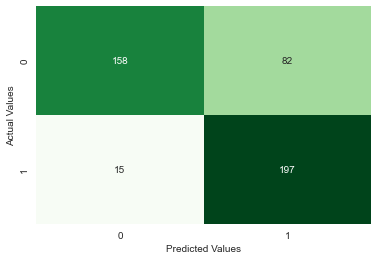

In [112]:
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
ma.confusion_matrix(y_test, y_pred)

### Feature selection:

In [113]:
from eli5.permutation_importance import get_score_importances

cols = X.columns.to_list()

# Calculate feature importance using permutation importance
def calculate_permutation_importance(model, X, y):
    base_score, score_decreases = get_score_importances(
        lambda x,y: accuracy_score(y, model.predict(x)), X, y, n_iter=3, random_state=42
    )
    feature_importances = np.mean(score_decreases, axis=0)
    feature_names = cols # Replace with your feature names
    return dict(zip(feature_names, feature_importances))


# Calculate permutation importance
feature_importances = calculate_permutation_importance(logreg_model, X_test.values, y_test)

In [114]:
sorted_cols = pd.Series(feature_importances).abs().sort_values(ascending=False)

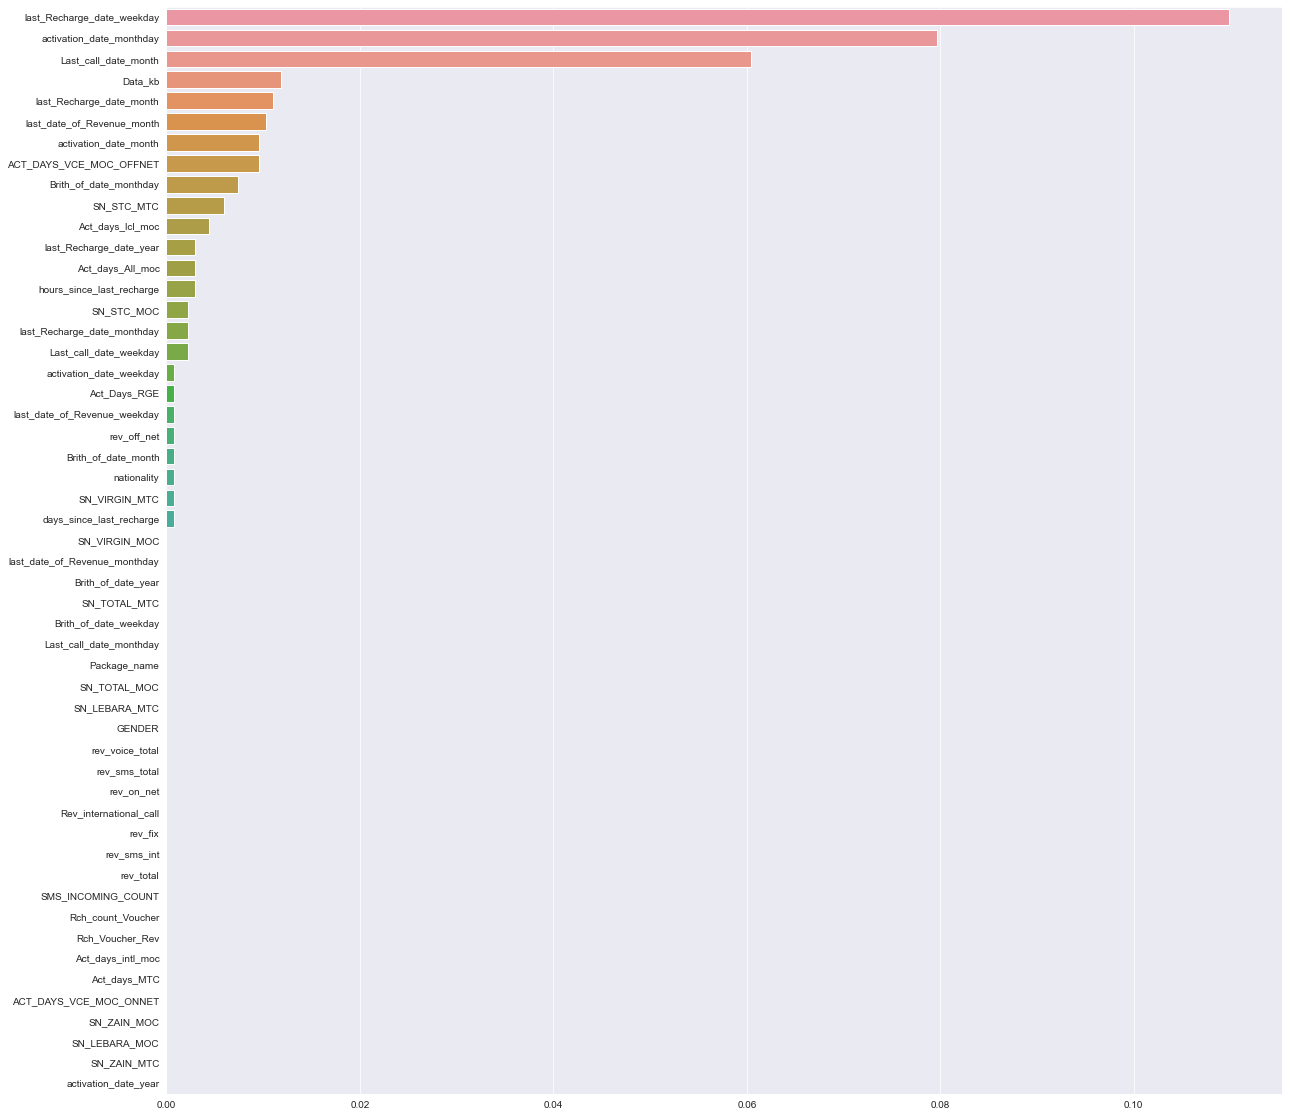

In [115]:
# Create a figure with the desired size
plt.figure(figsize=(20, 20))  # Adjust the width and height as per your preference

# Assuming you have already defined `feature_importances` and `np.abs(feature_importances)`
feature_importances = pd.Series(feature_importances.values(),index=feature_importances.keys()).abs().sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)

# Display the plot
plt.show()

In [116]:
cols_and_scores = {}
# Convert X_train and X_test to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

for n in range(1,int(len(sorted_cols))+1,1):

    cols = sorted_cols.head(n).index

    # Make predictions on the test set
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train[cols], y_train)
    predictions = classifier.predict(X_test[cols])

    # Calculate the evaluation metrics
    accuracies = []
    # Calculate and print the accuracy for each class
    unique_activities = np.unique(y_test)
    for activity in unique_activities:
        activity_indices = np.where(y_test == activity)[0]
        activity_predictions = predictions[activity_indices]
        activity_ground_truth = y_test.values[activity_indices]
        activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
        accuracies.append(activity_accuracy)

    accuracy = np.mean(accuracies)

    cols_and_scores[accuracy] = cols
    print(n,' : ', round(accuracy,4)*100,'%')

1  :  77.0 %
2  :  76.8 %
3  :  78.06 %
4  :  78.06 %
5  :  79.38 %
6  :  79.38 %
7  :  79.38 %
8  :  79.38 %
9  :  79.38 %
10  :  79.38 %
11  :  79.38 %
12  :  79.38 %
13  :  79.38 %
14  :  79.38 %
15  :  79.38 %
16  :  79.38 %
17  :  79.38 %
18  :  79.38 %
19  :  79.38 %
20  :  79.38 %
21  :  79.38 %
22  :  79.38 %
23  :  79.38 %
24  :  79.38 %
25  :  79.38 %
26  :  79.38 %
27  :  79.38 %
28  :  79.38 %
29  :  79.38 %
30  :  79.38 %
31  :  79.38 %
32  :  79.38 %
33  :  79.38 %
34  :  79.61 %
35  :  79.38 %
36  :  79.38 %
37  :  79.38 %
38  :  79.38 %
39  :  79.38 %
40  :  79.38 %
41  :  79.38 %
42  :  79.38 %
43  :  79.38 %
44  :  79.61 %
45  :  79.38 %
46  :  79.38 %
47  :  79.38 %
48  :  79.38 %
49  :  79.38 %
50  :  79.38 %
51  :  79.38 %
52  :  79.61 %


In [117]:
len(pd.Series(cols_and_scores)[max(cols_and_scores.keys())].to_list()) # Printing the best set columns for the model.

52

### Scores after feature selection:

Accuracy for Activity 0: 0.6583333333333333
Accuracy for Activity 1: 0.9339622641509434
Accuracy: 0.7876106194690266
Precision: 0.8194234557375122
Recall: 0.7876106194690266
F1-score: 0.7847606554079115


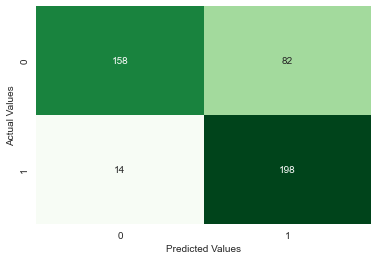

In [118]:
new_cols = cols_and_scores[max(cols_and_scores.keys())].to_list()
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
# Make predictions on the test set
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train[new_cols], y_train)
predictions = classifier.predict(X_test[new_cols])

# Calculate and print the accuracy for each activity
unique_activities = np.unique(y_test)
for activity in unique_activities:
    activity_indices = np.where(y_test == activity)
    activity_predictions = predictions[activity_indices]
    activity_ground_truth = y_test.values[activity_indices]
    activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
    print(f"Accuracy for Activity {activity}: {activity_accuracy}")

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
ma.confusion_matrix(y_test,predictions)

### Hyperparameter Tuning:

In [119]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Regularization parameter C
    'penalty': ['l1', 'l2'],               # Regularization type ('l1' or 'l2')
    'solver': ['liblinear', 'lbfgs']       # Algorithm to use in the optimization problem
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train[new_cols], y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8046784449313541


In [120]:
grid_search.best_estimator_

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

### Scores after Hyperparameter Tuning:

Accuracy for Activity 0: 0.6583333333333333
Accuracy for Activity 1: 0.9292452830188679
Accuracy: 0.7853982300884956
Precision: 0.8161117427378056
Recall: 0.7853982300884956
F1-score: 0.7826329370176821


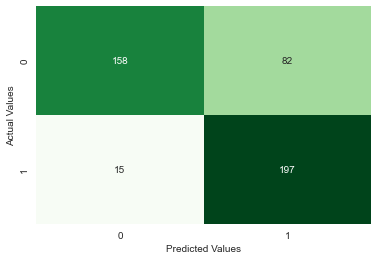

In [121]:
# Make predictions on the test set
classifier = grid_search.best_estimator_
predictions = classifier.predict(X_test[new_cols])

# Calculate and print the accuracy for each activity
unique_activities = np.unique(y_test)
for activity in unique_activities:
    activity_indices = np.where(y_test == activity)
    activity_predictions = predictions[activity_indices]
    activity_ground_truth = y_test.values[activity_indices]
    activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
    print(f"Accuracy for Activity {activity}: {activity_accuracy}")

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
ma.confusion_matrix(y_test, predictions)

In [122]:
# Save the trained model
import pickle

with open('LR_trained_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

## SVC model:

Accuracy: 0.76
Precision: 0.69
Recall: 0.89
F1 Score: 0.78
ROC AUC Score: 0.77


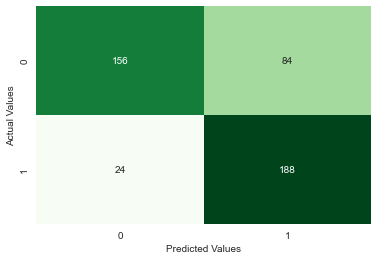

In [123]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier (SVC) model
svc_model = SVC(random_state=42)

# Train the SVC model on the training data
svc_model.fit(X_train, y_train) # I downsized the dataset as the model was taking too long to train.

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
ma.confusion_matrix(y_test, y_pred)

## Feature Selection:

In [124]:
from eli5.permutation_importance import get_score_importances

cols = X.columns.to_list()
# Calculate feature importance using permutation importance
def calculate_permutation_importance(model, X, y):
    base_score, score_decreases = get_score_importances(
        lambda x,y: accuracy_score(y, model.predict(x)), X, y, n_iter=3, random_state=42
    )
    feature_importances = np.mean(score_decreases, axis=0)
    feature_names = cols # Replace with your feature names
    return dict(zip(feature_names, feature_importances))

# Calculate permutation importance
feature_importances = calculate_permutation_importance(svc_model, X_test.values, y_test)

In [125]:
sorted_cols = pd.Series(feature_importances).abs().sort_values(ascending=False)

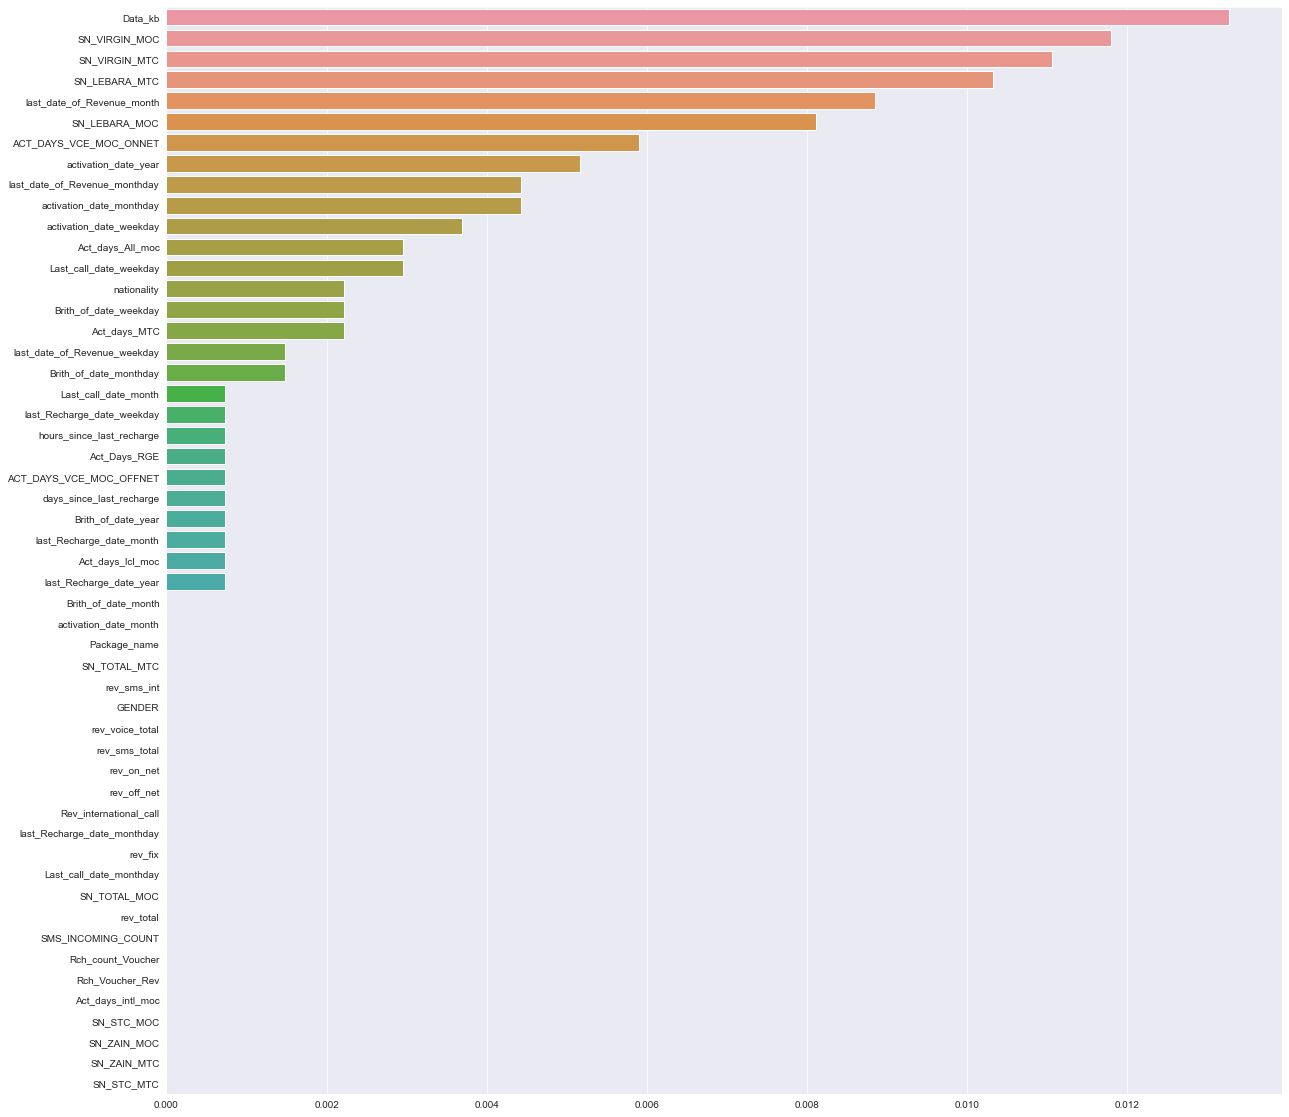

In [126]:
# Create a figure with the desired size
plt.figure(figsize=(20, 20))  # Adjust the width and height as per your preference

# Assuming you have already defined `feature_importances` and `np.abs(feature_importances)`
feature_importances = pd.Series(feature_importances.values(),index=feature_importances.keys()).abs().sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)

# Display the plot
plt.show()

In [127]:
cols_and_scores = {}
# Convert X_train and X_test to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

for n in range(1,int(len(sorted_cols))+1,1):

    cols = sorted_cols.head(n).index

    # Make predictions on the test set
    classifier = SVC(random_state=42)
    classifier.fit(X_train[cols], y_train)
    predictions = classifier.predict(X_test[cols])

    # Calculate the evaluation metrics
    accuracies = []
    # Calculate and print the accuracy for each activity
    unique_activities = np.unique(y_test)
    for activity in unique_activities:
        activity_indices = np.where(y_test == activity)[0]
        activity_predictions = predictions[activity_indices]
        activity_ground_truth = y_test.values[activity_indices]
        activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
        accuracies.append(activity_accuracy)

    accuracy = np.mean(accuracies)

    cols_and_scores[accuracy] = cols
    print(n,' : ', round(accuracy,4)*100,'%')

1  :  74.03 %
2  :  74.03 %
3  :  74.03 %
4  :  74.03 %
5  :  79.83 %
6  :  79.83 %
7  :  79.83 %
8  :  79.17 %
9  :  79.38 %
10  :  79.38 %
11  :  79.38 %
12  :  79.38 %
13  :  79.38 %
14  :  76.75 %
15  :  76.63 %
16  :  76.63 %
17  :  77.11 %
18  :  76.91 %
19  :  77.23 %
20  :  76.84 %
21  :  77.08 %
22  :  77.08 %
23  :  77.08 %
24  :  76.66 %
25  :  76.87 %
26  :  76.63 %
27  :  76.84 %
28  :  76.42 %
29  :  76.42 %
30  :  76.84 %
31  :  76.84 %
32  :  76.84 %
33  :  76.84 %
34  :  76.84 %
35  :  76.84 %
36  :  76.84 %
37  :  76.84 %
38  :  76.84 %
39  :  76.84 %
40  :  76.84 %
41  :  76.84 %
42  :  76.84 %
43  :  76.84 %
44  :  76.63 %
45  :  76.63 %
46  :  76.63 %
47  :  76.63 %
48  :  76.63 %
49  :  76.63 %
50  :  76.84 %
51  :  76.84 %
52  :  76.84 %


In [128]:
len(cols_and_scores[max(cols_and_scores.keys())].to_list())

7

the first 7 most important columns/features make the best scores.

## Scores after Feature Selection:

Accuracy for Activity 0: 0.7333333333333333
Accuracy for Activity 1: 0.8632075471698113
Accuracy: 0.7942477876106194
Precision: 0.8033575362803894
Recall: 0.7942477876106194
F1-score: 0.7940009917327443


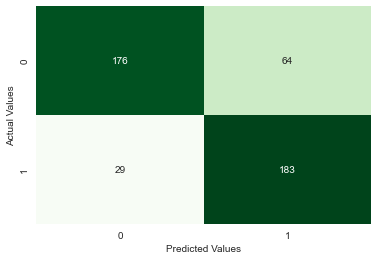

In [129]:
new_cols = cols_and_scores[max(cols_and_scores.keys())].to_list()
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
# Make predictions on the test set
classifier = SVC(random_state=42)
classifier.fit(X_train[new_cols], y_train)
predictions = classifier.predict(X_test[new_cols])

# Calculate and print the accuracy for each activity
unique_activities = np.unique(y_test)
for activity in unique_activities:
    activity_indices = np.where(y_test == activity)
    activity_predictions = predictions[activity_indices]
    activity_ground_truth = y_test.values[activity_indices]
    activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
    print(f"Accuracy for Activity {activity}: {activity_accuracy}")

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
ma.confusion_matrix(y_test,predictions)

## Hyperparameter Tuning:

In [130]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values for grid search
param_grid = {
    'C': [0.1, 1, 10],                 # Regularization parameter C
    'kernel': ['linear', 'rbf'],       # Kernel type ('linear' or 'rbf')
    'gamma': ['scale', 'auto'],        # Kernel coefficient ('scale' or 'auto')
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=SVC(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train[new_cols], y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.7884210116439824


In [131]:
grid_search.best_estimator_

SVC(C=1, kernel='linear', random_state=42)

### Scores after Hyperparameter Tuning:

In [132]:
new_cols

['Data_kb',
 'SN_VIRGIN_MOC',
 'SN_VIRGIN_MTC',
 'SN_LEBARA_MTC',
 'last_date_of_Revenue_month',
 'SN_LEBARA_MOC',
 'ACT_DAYS_VCE_MOC_ONNET']

Accuracy for Activity 0: 0.7333333333333333
Accuracy for Activity 1: 0.8632075471698113
Accuracy: 0.7942477876106194
Precision: 0.8033575362803894
Recall: 0.7942477876106194
F1-score: 0.7940009917327443


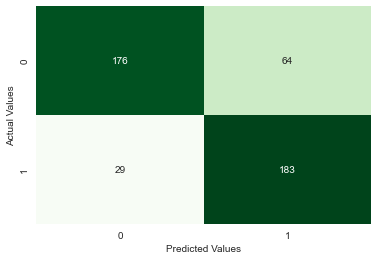

In [133]:
# Make predictions on the test set
classifier = SVC(C=1, gamma='auto', random_state=42)
classifier.fit(X_train[new_cols],y_train)
predictions = classifier.predict(X_test[new_cols])

# Calculate and print the accuracy for each activity
unique_activities = np.unique(y_test)
for activity in unique_activities:
    activity_indices = np.where(y_test == activity)
    activity_predictions = predictions[activity_indices]
    activity_ground_truth = y_test.values[activity_indices]
    activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
    print(f"Accuracy for Activity {activity}: {activity_accuracy}")

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
ma.confusion_matrix(y_test, predictions)

In [134]:
# Save the trained model
import pickle

with open('SVC_trained_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

## RandomForest (RF) Model:

Accuracy: 0.76
Precision: 0.71
Recall: 0.83
F1 Score: 0.77
ROC AUC Score: 0.77


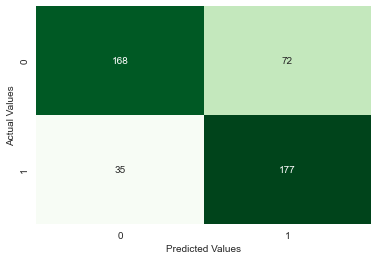

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
ma.confusion_matrix(y_test, y_pred)

In [136]:
from eli5.permutation_importance import get_score_importances

cols = X.columns.to_list()

# Calculate feature importance using permutation importance
def calculate_permutation_importance(model, X, y):
    base_score, score_decreases = get_score_importances(
        lambda x,y: accuracy_score(y, model.predict(x)), X, y, n_iter=3, random_state=42
    )
    feature_importances = np.mean(score_decreases, axis=0)
    feature_names = cols # Replace with your feature names
    return dict(zip(feature_names, feature_importances))


# Calculate permutation importance
feature_importances = calculate_permutation_importance(rf_model, X_test.values, y_test)

In [137]:
sorted_cols = pd.Series(feature_importances).abs().sort_values(ascending=False)

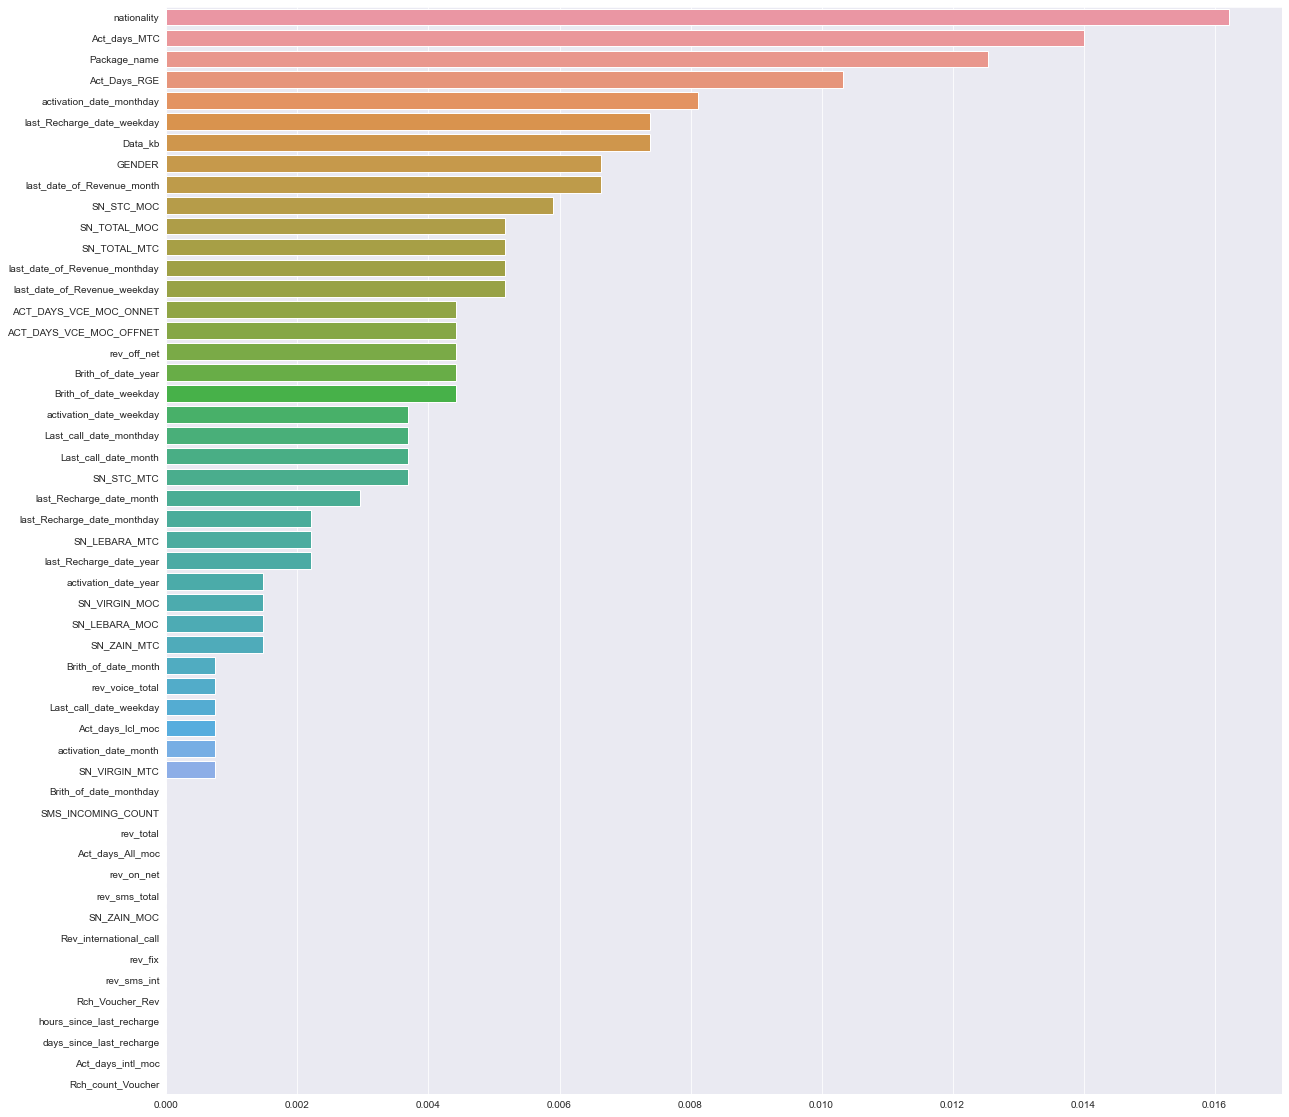

In [138]:
# Create a figure with the desired size
plt.figure(figsize=(20, 20))  # Adjust the width and height as per your preference

# Assuming you have already defined `feature_importances` and `np.abs(feature_importances)`
feature_importances = pd.Series(feature_importances.values(),index=feature_importances.keys()).abs().sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)

# Display the plot
plt.show()

In [139]:
cols_and_scores = {}
# Convert X_train and X_test to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

for n in range(1,int(len(sorted_cols))+1,1):

    cols = sorted_cols.head(n).index

    # Make predictions on the test set
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train[cols], y_train)
    predictions = classifier.predict(X_test[cols])

    # Calculate the evaluation metrics
    accuracies = []
    # Calculate and print the accuracy for each class
    unique_activities = np.unique(y_test)
    for activity in unique_activities:
        activity_indices = np.where(y_test == activity)[0]
        activity_predictions = predictions[activity_indices]
        activity_ground_truth = y_test.values[activity_indices]
        activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
        accuracies.append(activity_accuracy)

    accuracy = np.mean(accuracies)

    cols_and_scores[accuracy] = cols
    print(n,' : ', round(accuracy,4)*100,'%')

1  :  52.43 %
2  :  56.05 %
3  :  55.34 %
4  :  53.43 %
5  :  76.44 %
6  :  76.51 %
7  :  76.75 %
8  :  76.92999999999999 %
9  :  77.4 %
10  :  77.13 %
11  :  76.92999999999999 %
12  :  76.9 %
13  :  77.9 %
14  :  77.37 %
15  :  76.75 %
16  :  77.81 %
17  :  77.42999999999999 %
18  :  76.72 %
19  :  77.61 %
20  :  77.4 %
21  :  77.4 %
22  :  76.72 %
23  :  76.69 %
24  :  77.37 %
25  :  77.86999999999999 %
26  :  77.19 %
27  :  77.4 %
28  :  76.51 %
29  :  77.4 %
30  :  77.61 %
31  :  77.84 %
32  :  77.19 %
33  :  77.61 %
34  :  77.61 %
35  :  76.9 %
36  :  76.9 %
37  :  76.95 %
38  :  77.19 %
39  :  77.63 %
40  :  77.16 %
41  :  76.92999999999999 %
42  :  76.27000000000001 %
43  :  77.37 %
44  :  76.75 %
45  :  77.66 %
46  :  77.19 %
47  :  76.92999999999999 %
48  :  76.95 %
49  :  77.61 %
50  :  77.22 %
51  :  77.16 %
52  :  77.61 %


In [140]:
len(pd.Series(cols_and_scores)[max(cols_and_scores.keys())].to_list()) # Printing the best set columns for the model.

13

### Scores after feature selection:

Accuracy for Activity 0: 0.7041666666666667
Accuracy for Activity 1: 0.8537735849056604
Accuracy: 0.7743362831858407
Precision: 0.7855527461722153
Recall: 0.7743362831858407
F1-score: 0.7738057258579077


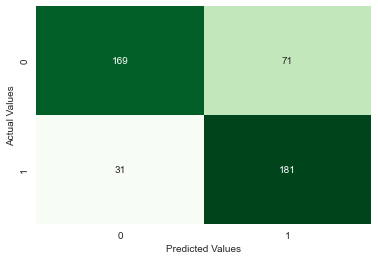

In [141]:
new_cols = pd.Series(cols_and_scores)[max(cols_and_scores.keys())].to_list()
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
# Make predictions on the test set
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train[new_cols], y_train)
predictions = classifier.predict(X_test[new_cols])

# Calculate and print the accuracy for each activity
unique_activities = np.unique(y_test)
for activity in unique_activities:
    activity_indices = np.where(y_test == activity)
    activity_predictions = predictions[activity_indices]
    activity_ground_truth = y_test.values[activity_indices]
    activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
    print(f"Accuracy for Activity {activity}: {activity_accuracy}")

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
ma.confusion_matrix(y_test,predictions)

### Hyperparameter Tuning:

In [142]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [100, 250, 500, 1000],    # Number of decision trees in the forest
    'max_depth': [None, 10, 20],             # Maximum depth of each decision tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train[new_cols], y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Best Score: 0.809849949580468


In [143]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=1000,
                       random_state=42)

### Scores after Hyperparameter Tuning:

Accuracy for Activity 0: 0.6708333333333333
Accuracy for Activity 1: 0.9150943396226415
Accuracy: 0.7853982300884956
Precision: 0.810880390353372
Recall: 0.7853982300884956
F1-score: 0.7832724354235749


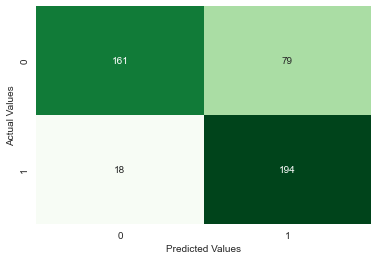

In [144]:
# Make predictions on the test set
classifier = grid_search.best_estimator_
predictions = classifier.predict(X_test[new_cols])

# Calculate and print the accuracy for each activity
unique_activities = np.unique(y_test)
for activity in unique_activities:
    activity_indices = np.where(y_test == activity)
    activity_predictions = predictions[activity_indices]
    activity_ground_truth = y_test.values[activity_indices]
    activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
    print(f"Accuracy for Activity {activity}: {activity_accuracy}")

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
ma.confusion_matrix(y_test, predictions)

In [145]:
# Save the trained model
import pickle

with open('RF_trained_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

## LSTM Model:

In [146]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras import callbacks
# Reshape the input data for LSTM (sequence length, number of features)
sequence_length = 1  # We use 1 here since we don't have time sequences, adjust as needed
X_train_LSTM = X_train.values.reshape(X_train.shape[0], sequence_length, X_train.shape[1])
X_test_LSTM = X_test.values.reshape(X_test.shape[0], sequence_length, X_test.shape[1])

In [147]:
# Initialize the deeper and wider LSTM model
lstm_model = Sequential()

# Add the first LSTM layer to the model (deeper)
lstm_model.add(LSTM(units=64, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2]), return_sequences=True))
# Add a second LSTM layer (deeper)
lstm_model.add(LSTM(units=128))

# Add Dense layer to increase the width
lstm_model.add(Dense(units=128, activation='relu'))

# Add output Dense layer with sigmoid activation for binary classification
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001, restore_best_weights = True)

# Train the LSTM model on the training data
lstm_model.fit(X_train_LSTM, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1, callbacks=early_stopping)

# Evaluate the model performance on the test set
loss, accuracy = lstm_model.evaluate(X_test_LSTM, y_test, batch_size=32, verbose=1)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/100
115/115 [==============================] - 3s 8ms/step - loss: 0.5328 - accuracy: 0.7343 - val_loss: 0.4676 - val_accuracy: 0.7808
Epoch 2/100
115/115 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.7969 - val_loss: 0.4645 - val_accuracy: 0.7783
Epoch 3/100
115/115 [==============================] - 0s 4ms/step - loss: 0.4256 - accuracy: 0.8005 - val_loss: 0.4597 - val_accuracy: 0.7808
Epoch 4/100
115/115 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.8038 - val_loss: 0.4623 - val_accuracy: 0.7808
Epoch 5/100
115/115 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8057 - val_loss: 0.4682 - val_accuracy: 0.7783
Epoch 6/100
115/115 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8051 - val_loss: 0.4639 - val_accuracy: 0.7783
Epoch 7/100
115/115 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8062 - val_loss: 0.4582 - val_accuracy: 0.7734

15/15 [==============================] - 1s 2ms/step
Accuracy for Activity 0: 0.65
Accuracy for Activity 1: 0.9433962264150944
Accuracy: 0.7876106194690266
Precision: 0.8233471626217481
Recall: 0.7876106194690266
F1-score: 0.7842857382747561


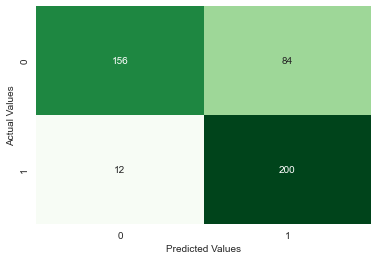

In [148]:
# Predict using the trained LSTM model
predictions = lstm_model.predict(X_test_LSTM)

# Convert predictions to binary class labels (0 or 1) using a threshold
threshold = 0.5  # Adjust the threshold as needed
binary_predictions = (predictions > threshold).astype(int)
# Calculate and print the accuracy for each activity
unique_activities = np.unique(y_test)
for activity in unique_activities:
    activity_indices = np.where(y_test == activity)
    activity_predictions = binary_predictions[activity_indices]
    activity_ground_truth = y_test.values[activity_indices]
    activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
    print(f"Accuracy for Activity {activity}: {activity_accuracy}")

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions, average='weighted')
recall = recall_score(y_test, binary_predictions, average='weighted')
f1 = f1_score(y_test, binary_predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
ma.confusion_matrix(y_test, binary_predictions)

## XGB:

Accuracy: 0.78
Precision: 0.72
Recall: 0.87
F1 Score: 0.79
ROC AUC Score: 0.79


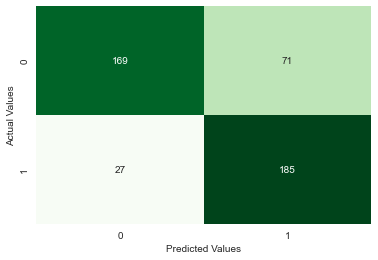

In [149]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test).round()

# Evaluate the model performance
accuracy = accuracy_score(y_test, xgb_preds)
precision = precision_score(y_test, xgb_preds)
recall = recall_score(y_test, xgb_preds)
f1 = f1_score(y_test, xgb_preds)
roc_auc = roc_auc_score(y_test, xgb_preds)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
ma.confusion_matrix(y_test, xgb_preds)

In [150]:
# Calculate permutation importance
feature_importances = xgb_model.feature_importances_

In [153]:
sorted_cols = pd.Series(feature_importances, index=X.columns).abs().sort_values(ascending=False)

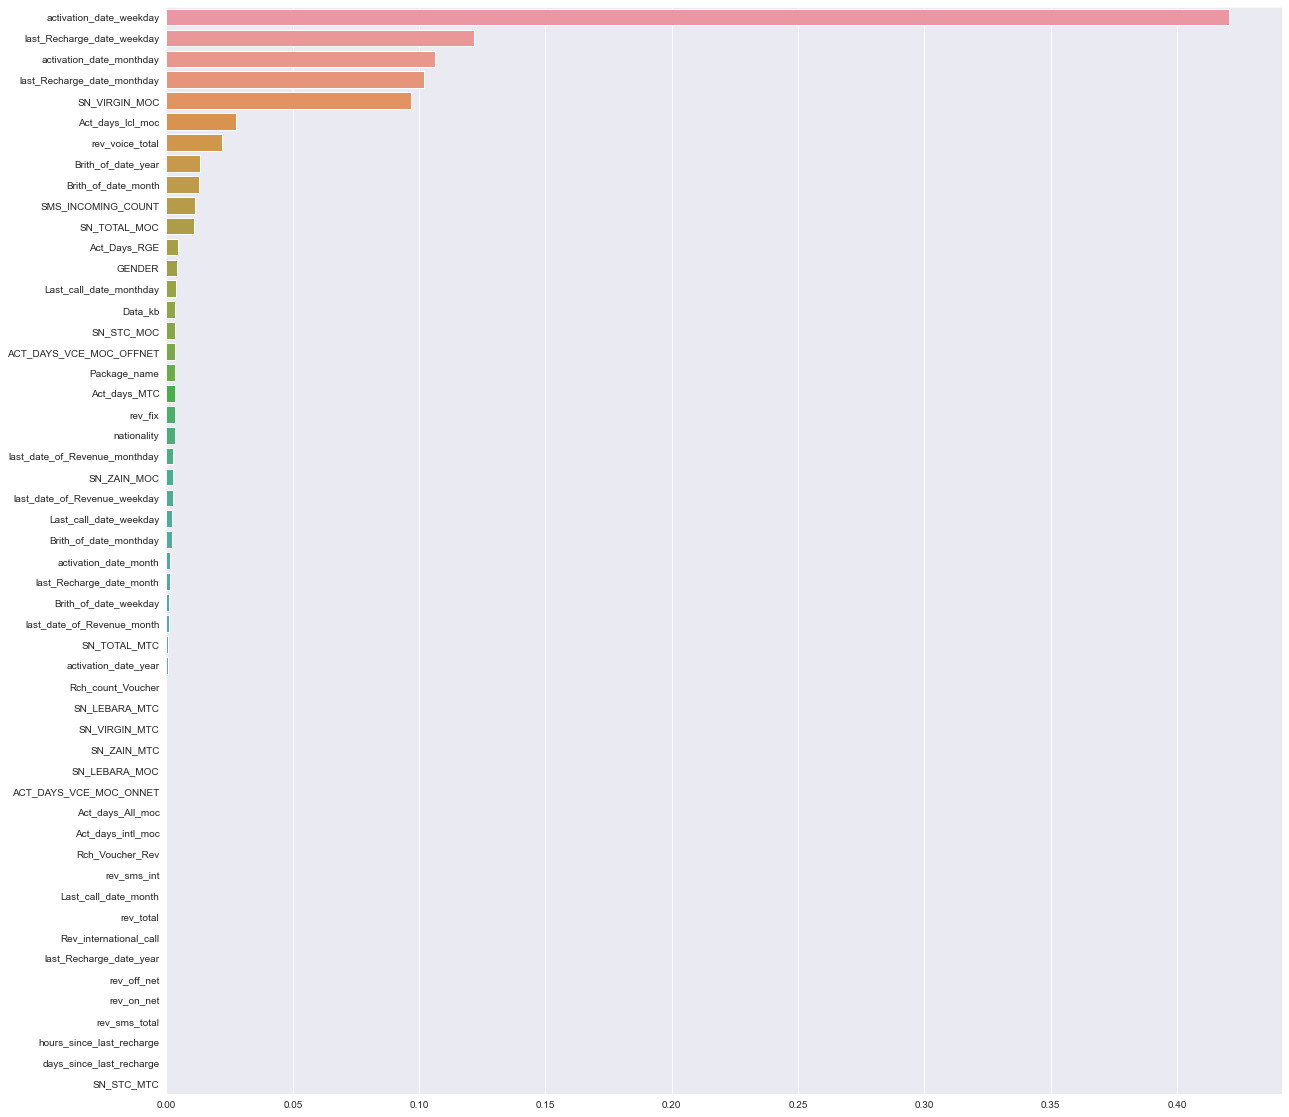

In [155]:
# Create a figure with the desired size
plt.figure(figsize=(20, 20))  # Adjust the width and height as per your preference

# Assuming you have already defined `feature_importances` and `np.abs(feature_importances)`
feature_importances = pd.Series(sorted_cols.values,index=sorted_cols.index).abs().sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)

# Display the plot
plt.show()

In [156]:
cols_and_scores = {}
# Convert X_train and X_test to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

for n in range(1,int(len(sorted_cols))+1,1):

    cols = sorted_cols.head(n).index

    # Make predictions on the test set
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train[cols], y_train)
    predictions = classifier.predict(X_test[cols])

    # Calculate the evaluation metrics
    accuracies = []
    # Calculate and print the accuracy for each class
    unique_activities = np.unique(y_test)
    for activity in unique_activities:
        activity_indices = np.where(y_test == activity)[0]
        activity_predictions = predictions[activity_indices]
        activity_ground_truth = y_test.values[activity_indices]
        activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
        accuracies.append(activity_accuracy)

    accuracy = np.mean(accuracies)

    cols_and_scores[accuracy] = cols
    print(n,' : ', round(accuracy,4)*100,'%')

1  :  76.73 %
2  :  76.74 %
3  :  78.06 %
4  :  77.82 %
5  :  77.82 %
6  :  77.98 %
7  :  77.82 %
8  :  77.98 %
9  :  79.17 %
10  :  79.17 %
11  :  79.17 %
12  :  78.99000000000001 %
13  :  78.99000000000001 %
14  :  79.38 %
15  :  79.38 %
16  :  79.38 %
17  :  79.38 %
18  :  80.0 %
19  :  79.80000000000001 %
20  :  80.0 %
21  :  80.88 %
22  :  79.80000000000001 %
23  :  79.80000000000001 %
24  :  78.99000000000001 %
25  :  78.99000000000001 %
26  :  80.27 %
27  :  80.03 %
28  :  79.41 %
29  :  79.38 %
30  :  79.61 %
31  :  79.38 %
32  :  79.61 %
33  :  79.38 %
34  :  79.38 %
35  :  79.38 %
36  :  79.61 %
37  :  79.38 %
38  :  79.38 %
39  :  79.61 %
40  :  79.38 %
41  :  79.38 %
42  :  79.38 %
43  :  79.38 %
44  :  79.61 %
45  :  79.38 %
46  :  79.38 %
47  :  79.38 %
48  :  79.61 %
49  :  79.61 %
50  :  79.61 %
51  :  79.38 %
52  :  79.61 %


In [157]:
len(pd.Series(cols_and_scores)[max(cols_and_scores.keys())].to_list()) # Printing the best set columns for the model.

21

## scores after feature selection:

Accuracy for Activity 0: 0.7125
Accuracy for Activity 1: 0.8915094339622641
Accuracy: 0.80
Precision: 0.73
Recall: 0.89
F1 Score: 0.80
ROC AUC Score: 0.80


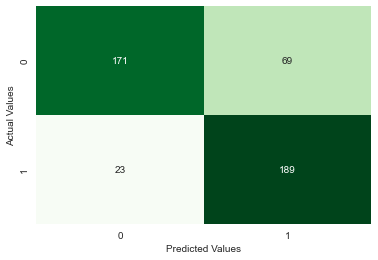

In [161]:
from xgboost import XGBClassifier

xgb_cols = pd.Series(cols_and_scores)[max(cols_and_scores.keys())].to_list()
# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train[xgb_cols], y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_test[xgb_cols]).round()

# Calculate and print the accuracy for each activity
unique_activities = np.unique(y_test)
for activity in unique_activities:
    activity_indices = np.where(y_test == activity)
    activity_predictions = xgb_preds[activity_indices]
    activity_ground_truth = y_test.values[activity_indices]
    activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
    print(f"Accuracy for Activity {activity}: {activity_accuracy}")

# Evaluate the model performance
accuracy = accuracy_score(y_test, xgb_preds)
precision = precision_score(y_test, xgb_preds)
recall = recall_score(y_test, xgb_preds)
f1 = f1_score(y_test, xgb_preds)
roc_auc = roc_auc_score(y_test, xgb_preds)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
ma.confusion_matrix(y_test, xgb_preds)

In [160]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their possible values for grid search
# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [100, 250, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000}
Best Score: 0.8073868344430725


Accuracy for Activity 0: 0.6916666666666667
Accuracy for Activity 1: 0.9198113207547169
Accuracy: 0.7986725663716814
Precision: 0.8216487067047707
Recall: 0.7986725663716814
F1-score: 0.7970369164117986


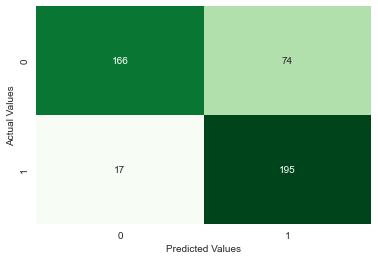

In [ ]:
# Make predictions on the test set
classifier = grid_search.best_estimator_
predictions = classifier.predict(X_test)

# Calculate and print the accuracy for each activity
unique_activities = np.unique(y_test)
for activity in unique_activities:
    activity_indices = np.where(y_test == activity)
    activity_predictions = predictions[activity_indices]
    activity_ground_truth = y_test.values[activity_indices]
    activity_accuracy = accuracy_score(activity_ground_truth, activity_predictions)
    print(f"Accuracy for Activity {activity}: {activity_accuracy}")

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
ma.confusion_matrix(y_test, predictions)

In [ ]:
# Save the trained model
import pickle

with open('XGB_trained_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)